In [7]:
#import neccesary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [8]:
#load data
wine_data = pd.read_csv("../input/redwinequality/datasets_4458_8204_winequality-red.csv")

In [9]:
#checking the datas
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [11]:
#counting the frequency of each class
wine_data.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [10]:
#check for any null values
wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [12]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


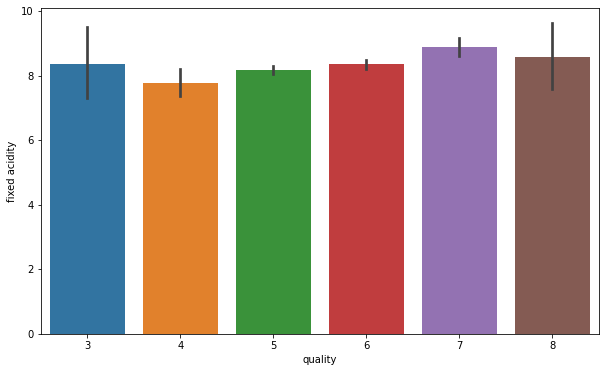

In [14]:
#visualizing the data
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = wine_data)

In [15]:
#grouping the data with new features
bins = (2, 6, 8)
group_names = ['bad', 'good']
wine_data['quality_name'] = pd.cut(wine_data['quality'], bins = bins, labels = group_names)

In [16]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_name
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,bad
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,bad


In [17]:
#non numeric to numeric
le = LabelEncoder()
wine_data['quality_mark'] = le.fit_transform(wine_data.quality_name)

In [18]:
#check the value counts
wine_data.quality_name.value_counts()

bad     1382
good     217
Name: quality_name, dtype: int64

In [19]:
#value count after encoding
wine_data.quality_mark.value_counts()

0    1382
1     217
Name: quality_mark, dtype: int64

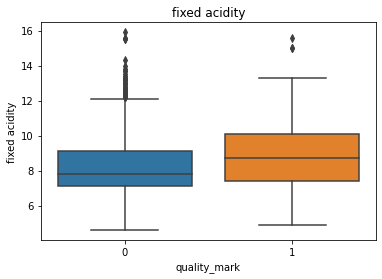

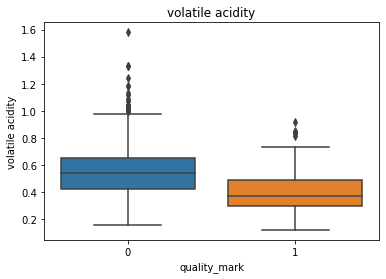

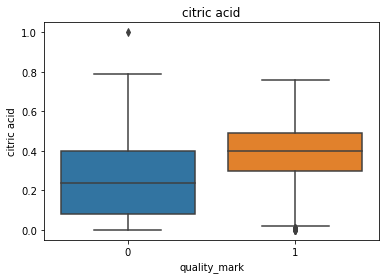

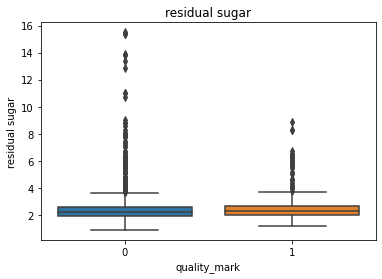

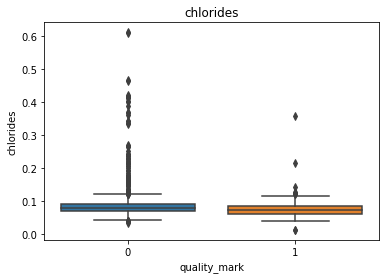

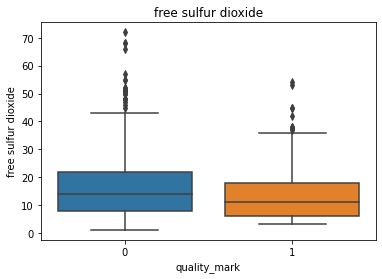

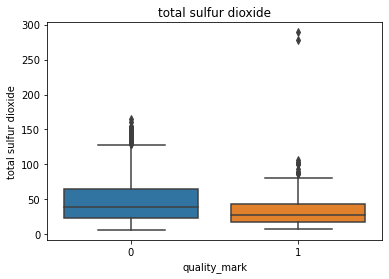

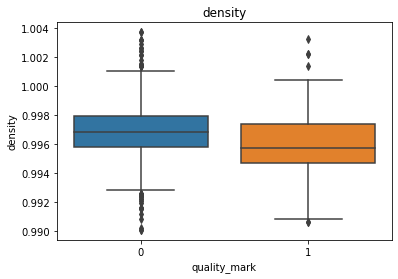

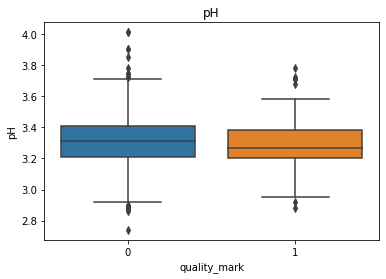

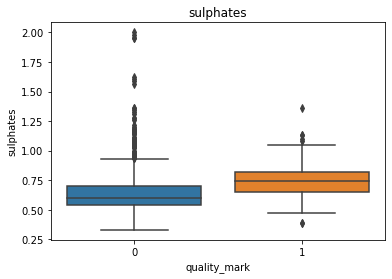

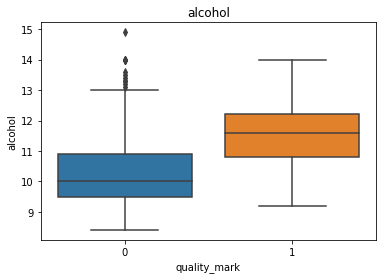

In [20]:
#checking for any outliers
for ingredients in wine_data.columns[:11]:
    plt.title(ingredients)
    sns.boxplot(x='quality_mark', y=ingredients, data=wine_data)
    plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f42fb9bcc10>,
      dtype=object)

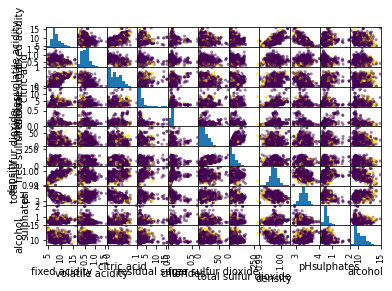

In [22]:
pd.plotting.scatter_matrix(wine_data.drop(['quality','quality_name','quality_mark'], axis=1), c=wine_data.quality_mark)

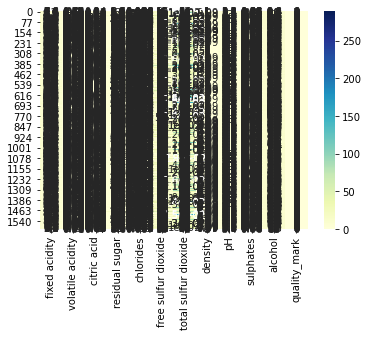

In [21]:
#correlation between the datas
sns.heatmap(wine_data.drop(['quality','quality_name'], axis=1),annot=True, cmap='YlGnBu')

In [23]:
#importing libraries for model building
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

X = wine_data.drop(['quality','quality_name','quality_mark'], axis=1)
y = wine_data.quality_mark

In [24]:
#splitting the data in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [28]:
#considering the apis in one list
classifiers = [LinearRegression(), SVC(), LinearSVC(), SGDClassifier(penalty=None), RandomForestClassifier(n_estimators=100, max_depth=6)]

In [29]:
#normalizing the datas
st_scl = StandardScaler()
X_train = st_scl.fit_transform(X_train)
X_test = st_scl.fit_transform(X_test)

In [30]:
#fitting and testing the different models
train_model = []

for classes in classifiers:
    classes.fit(X_train, y_train)
    train_score = classes.score(X_train, y_train)
    test_score = classes.score(X_test, y_test)
    train_model.append([classes, train_score, test_score])

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [33]:
#removing models with less trainning score
for train_score in train_model:
    if train_score[1]<0.88:
        train_model.remove(train_score)

In [34]:
#qualified models
train_model

[[SVC(), 0.900804289544236, 0.88125],
 [LinearSVC(), 0.8873994638069705, 0.88125],
 [RandomForestClassifier(max_depth=6), 0.9499553172475425, 0.8875]]

In [35]:
#For SVC
train_model[0][0].fit(X_train, y_train)
y_predict_svc = train_model[0][0].predict(X_test)
print(accuracy_score(y_test, y_predict_svc))
print(classification_report(y_test, y_predict_svc))

0.88125
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       413
           1       0.68      0.28      0.40        67

    accuracy                           0.88       480
   macro avg       0.79      0.63      0.67       480
weighted avg       0.86      0.88      0.86       480



In [36]:
#For LinearSVC
train_model[1][0].fit(X_train, y_train)
y_predict_lsvc = train_model[1][0].predict(X_test)
print(accuracy_score(y_test, y_predict_lsvc))
print(classification_report(y_test, y_predict_lsvc))

0.88125
              precision    recall  f1-score   support

           0       0.89      0.99      0.93       413
           1       0.73      0.24      0.36        67

    accuracy                           0.88       480
   macro avg       0.81      0.61      0.65       480
weighted avg       0.87      0.88      0.85       480



/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [37]:
#For RandomForestClassifier
train_model[2][0].fit(X_train, y_train)
y_predict_rfc = train_model[2][0].predict(X_test)
print(accuracy_score(y_test, y_predict_rfc))
print(classification_report(y_test, y_predict_rfc))

0.8645833333333334
              precision    recall  f1-score   support

           0       0.89      0.97      0.92       413
           1       0.53      0.24      0.33        67

    accuracy                           0.86       480
   macro avg       0.71      0.60      0.63       480
weighted avg       0.84      0.86      0.84       480



In [38]:
#as SVC as close train and test accuracy so loss of data is minimum hence tunning hyperparameter in SVC
params = {
    'C': list(np.linspace(0.1,2,20)),
    'kernel':['linear', 'rbf'],
    'gamma' :list(np.linspace(0.1,2,20))
}
svc=SVC()
grid_svc = GridSearchCV(estimator=svc, param_grid=params, scoring='roc_auc', cv=5, refit=True, return_train_score=True)

In [39]:
grid_svc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,
                               0.7999999999999999, 0.8999999999999999,
                               0.9999999999999999, 1.0999999999999999, 1.2, 1.3,
                               1.4, 1.5, 1.5999999999999999, 1.7, 1.8, 1.9,
                               2.0],
                         'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,
                                   0.7999999999999999, 0.8999999999999999,
                                   0.9999999999999999, 1.0999999999999999, 1.2,
                                   1.3, 1.4, 1.5, 1.5999999999999999, 1.7, 1.8,
                                   1.9, 2.0],
                         'kernel': ['linear', 'rbf']},
             return_train_score=True, scoring='roc_auc')

In [40]:
grid_svc.best_params_

{'C': 0.8999999999999999, 'gamma': 1.0999999999999999, 'kernel': 'rbf'}

In [41]:
#using new parameters
svc_new = SVC(C=0.8999999999999999, gamma=1.0999999999999999, kernel='rbf')
svc_new.fit(X_train, y_train)
y_predict = svc_new.predict(X_test)

In [42]:
accuracy_score(y_test, y_predict)

0.8895833333333333

In [43]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94       413
           1       0.85      0.25      0.39        67

    accuracy                           0.89       480
   macro avg       0.87      0.62      0.67       480
weighted avg       0.89      0.89      0.86       480



***Here we can see that the accuracy has increased by a slight margin***